# Neural Network backpropagation

In [660]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import default_rng


In [661]:
# Settings
contmax = 1;
errormax = 3;
# ne = input('Number of inputs: ');
# ns = input('Number of outputs: ');
# nm = input('Number .. hidden layer of neurons: ');
# nt = ne + ns;
# eta = input('ratio of learn: ');
# beta = input('Momentum: ');
# rbias = input('Bias? : 1=Yes or 0=No: ');
# errormax = input('Error max : ');
# errormax = errormax/100;
# contmax = input(' Number max of iterations :')

ne = 3; # x1, x2, u
ns = 2; # y=x1, x2 0 dx1
nm = 5; # neurons in hidden layer
nt = ne + ns;
eta = 0.01;   
beta = 0.5;
bias = 1;
errormax = 3;
errormax = errormax/100;
contmax = 100;  # 100

In [662]:
datafile = pd.read_csv('nn_pattern.csv')
datafile

,Unnamed: 0,input_1,input_2,input_3,output_1,output_2
0,0,79.950186,0.000000,29.950186,0.000000,0.000000
1,1,76.406396,-70.875789,26.406396,76.406396,-70.875789
2,2,74.280945,-42.509028,24.280945,74.280945,-42.509028
3,3,71.436970,-56.879489,21.436970,71.436970,-56.879489
4,4,76.445864,100.177877,26.445864,76.445864,100.177877
5,5,72.279475,-83.327790,22.279475,72.279475,-83.327790
6,6,70.763619,-30.317126,20.763619,70.763619,-30.317126
7,7,72.222960,29.186827,22.222960,72.222960,29.186827
8,8,77.465435,104.849498,27.465435,77.465435,104.849498
9,9,77.743740,5.566112,27.743740,77.743740,5.566112


In [663]:
del datafile['Unnamed: 0']
datafile

,input_1,input_2,input_3,output_1,output_2
0,79.950186,0.000000,29.950186,0.000000,0.000000
1,76.406396,-70.875789,26.406396,76.406396,-70.875789
2,74.280945,-42.509028,24.280945,74.280945,-42.509028
3,71.436970,-56.879489,21.436970,71.436970,-56.879489
4,76.445864,100.177877,26.445864,76.445864,100.177877
5,72.279475,-83.327790,22.279475,72.279475,-83.327790
6,70.763619,-30.317126,20.763619,70.763619,-30.317126
7,72.222960,29.186827,22.222960,72.222960,29.186827
8,77.465435,104.849498,27.465435,77.465435,104.849498
9,77.743740,5.566112,27.743740,77.743740,5.566112


In [664]:
kn = len(datafile)
kn

20

In [665]:
df_input = datafile[['input_1', 'input_2', 'input_3']]
df_input

,input_1,input_2,input_3
0,79.950186,0.000000,29.950186
1,76.406396,-70.875789,26.406396
2,74.280945,-42.509028,24.280945
3,71.436970,-56.879489,21.436970
4,76.445864,100.177877,26.445864
5,72.279475,-83.327790,22.279475
6,70.763619,-30.317126,20.763619
7,72.222960,29.186827,22.222960
8,77.465435,104.849498,27.465435
9,77.743740,5.566112,27.743740


In [666]:
df_output = datafile[['output_1', 'output_2']]
df_output

,output_1,output_2
0,0.000000,0.000000
1,76.406396,-70.875789
2,74.280945,-42.509028
3,71.436970,-56.879489
4,76.445864,100.177877
5,72.279475,-83.327790
6,70.763619,-30.317126
7,72.222960,29.186827
8,77.465435,104.849498
9,77.743740,5.566112


In [667]:
# Transform to numpy
np_input = df_input.to_numpy()
np_input

array([[  79.95018576,    0.        ,   29.95018576],
       [  76.40639633,  -70.87578858,   26.40639633],
       [  74.28094492,  -42.50902817,   24.28094492],
       [  71.43697047,  -56.87948918,   21.43697047],
       [  76.44586432,  100.17787713,   26.44586432],
       [  72.27947482,  -83.3277901 ,   22.27947482],
       [  70.7636185 ,  -30.31712624,   20.7636185 ],
       [  72.22295983,   29.1868266 ,   22.22295983],
       [  77.46543473,  104.849498  ,   27.46543473],
       [  77.74374034,    5.56611212,   27.74374034],
       [  73.83064694,  -78.26186794,   23.83064694],
       [  77.34811282,   70.34931744,   27.34811282],
       [  78.90240712,   31.08588601,   28.90240712],
       [  79.85761793,   19.10421634,   29.85761793],
       [  76.42295742,  -68.69321026,   26.42295742],
       [  72.22468363,  -83.96547574,   22.22468363],
       [  75.37859536,   63.07823453,   25.37859536],
       [  79.51918818,   82.81185649,   29.51918818],
       [  79.96522633,    8.

In [668]:
np_output = df_output.to_numpy()
np_output

array([[   0.        ,    0.        ],
       [  76.40639633,  -70.87578858],
       [  74.28094492,  -42.50902817],
       [  71.43697047,  -56.87948918],
       [  76.44586432,  100.17787713],
       [  72.27947482,  -83.3277901 ],
       [  70.7636185 ,  -30.31712624],
       [  72.22295983,   29.1868266 ],
       [  77.46543473,  104.849498  ],
       [  77.74374034,    5.56611212],
       [  73.83064694,  -78.26186794],
       [  77.34811282,   70.34931744],
       [  78.90240712,   31.08588601],
       [  79.85761793,   19.10421634],
       [  76.42295742,  -68.69321026],
       [  72.22468363,  -83.96547574],
       [  75.37859536,   63.07823453],
       [  79.51918818,   82.81185649],
       [  79.96522633,    8.9207629 ],
       [  72.37098926, -151.88474148]])

### Data Scaling

In [669]:
# Input Scale
input_max = np_input.max((0))
input_min = np_input.min((0))
input_y = 3*np.ones(len(input_max)) +3*np.ones(len(input_min))
m = input_y / (input_max - input_min) 
np_input_scala = m * (np_input - input_min) - 3*np.ones(len(input_min))
np_input_scala

array([[ 2.99019265,  0.54961789,  2.99019265],
       [ 0.67942947, -1.10678265,  0.67942947],
       [-0.70649229, -0.44383811, -0.70649229],
       [-2.56093415, -0.77968254, -2.56093415],
       [ 0.70516496,  2.89082202,  0.70516496],
       [-2.0115708 , -1.39779178, -2.0115708 ],
       [-3.        , -0.15890762, -3.        ],
       [-2.04842196,  1.23172776, -2.04842196],
       [ 1.369986  ,  3.        ,  1.369986  ],
       [ 1.55145794,  0.67970055,  1.55145794],
       [-1.00011357, -1.2793988 , -1.00011357],
       [ 1.29348508,  2.19371454,  1.29348508],
       [ 2.30697815,  1.27610967,  2.30697815],
       [ 2.92983287,  0.99609241,  2.92983287],
       [ 0.69022829, -1.05577476,  0.69022829],
       [-2.04729794, -1.4126948 , -2.04729794],
       [ 0.00924161,  2.02378591,  0.00924161],
       [ 2.70915639,  2.48496995,  2.70915639],
       [ 3.        ,  0.75810032,  3.        ],
       [-1.9518979 , -3.        , -1.9518979 ]])

In [670]:
# Output Scale
output_max = np_output.max((0))
output_min = np_output.min((0))
output_y = 0.9*np.ones(len(output_max)) +0.9*np.ones(len(output_min))
m2 = output_y / (output_max - output_min) 
np_output_scala = m2 * (np_output - output_min) - 0.9*np.ones(len(output_min))
y_deseada = np_output_scala
y_deseada

array([[-0.9       ,  0.16488537],
       [ 0.8198915 , -0.33203479],
       [ 0.77204805, -0.13315143],
       [ 0.7080308 , -0.23390476],
       [ 0.82077992,  0.86724661],
       [ 0.72699539, -0.41933753],
       [ 0.69287379, -0.04767229],
       [ 0.72572325,  0.36951833],
       [ 0.84373023,  0.9       ],
       [ 0.84999483,  0.20391016],
       [ 0.76191194, -0.38381964],
       [ 0.84108934,  0.65811436],
       [ 0.87607617,  0.3828329 ],
       [ 0.89757776,  0.29882772],
       [ 0.82026429, -0.31673243],
       [ 0.72576205, -0.42380844],
       [ 0.79675593,  0.60713577],
       [ 0.88995978,  0.74549098],
       [ 0.9       ,  0.22743009],
       [ 0.72905536, -0.9       ]])

In [671]:
#np_input_scala with bias
b = np.ones(kn).reshape(-1,1)
if bias == 1:
    entrared = np.concatenate([np_input_scala, b], axis=1)
    ne = ne +1
else:
    entrared = np_input_scala
entrared

array([[ 2.99019265,  0.54961789,  2.99019265,  1.        ],
       [ 0.67942947, -1.10678265,  0.67942947,  1.        ],
       [-0.70649229, -0.44383811, -0.70649229,  1.        ],
       [-2.56093415, -0.77968254, -2.56093415,  1.        ],
       [ 0.70516496,  2.89082202,  0.70516496,  1.        ],
       [-2.0115708 , -1.39779178, -2.0115708 ,  1.        ],
       [-3.        , -0.15890762, -3.        ,  1.        ],
       [-2.04842196,  1.23172776, -2.04842196,  1.        ],
       [ 1.369986  ,  3.        ,  1.369986  ,  1.        ],
       [ 1.55145794,  0.67970055,  1.55145794,  1.        ],
       [-1.00011357, -1.2793988 , -1.00011357,  1.        ],
       [ 1.29348508,  2.19371454,  1.29348508,  1.        ],
       [ 2.30697815,  1.27610967,  2.30697815,  1.        ],
       [ 2.92983287,  0.99609241,  2.92983287,  1.        ],
       [ 0.69022829, -1.05577476,  0.69022829,  1.        ],
       [-2.04729794, -1.4126948 , -2.04729794,  1.        ],
       [ 0.00924161,  2.

In [672]:
# put value to weights
rng = default_rng(42)
v = np.matrix(rng.random((ne,nm)))
v

matrix([[0.77395605, 0.43887844, 0.85859792, 0.69736803, 0.09417735],
        [0.97562235, 0.7611397 , 0.78606431, 0.12811363, 0.45038594],
        [0.37079802, 0.92676499, 0.64386512, 0.82276161, 0.4434142 ],
        [0.22723872, 0.55458479, 0.06381726, 0.82763117, 0.6316644 ]])

In [673]:
w = np.matrix(rng.random((nm,ns)))
w

matrix([[0.75808774, 0.35452597],
        [0.97069802, 0.89312112],
        [0.7783835 , 0.19463871],
        [0.466721  , 0.04380377],
        [0.15428949, 0.68304895]])

## Training algorithm

In [675]:
# Init variables
contmax = 1000

# error_acumulado = np.zeros((contmax,ns))
mentra  = np.matrix(np.zeros((1,ne)))
x       = np.matrix(np.zeros((1,ne)))
msale   = np.matrix(np.zeros((1,nm)))
salida  = np.matrix(np.zeros((1,ns)))
deseada = np.matrix(np.zeros((1,ns)))
deseadaT= np.matrix(np.zeros((ns,1)))
error   = np.matrix(np.zeros((1,ns)))
errorT  = np.matrix(np.zeros((ns,1)))
sumdes2 = np.matrix(np.zeros((1,ns)))
errorl  = np.matrix(np.zeros((1,ns)))
derivada= np.matrix(np.zeros((1,nm)))
deltav  = np.matrix(np.zeros((ne,nm)))
deltaw  = np.matrix(np.zeros((nm,ns)))
error_acumulado = np.matrix(np.zeros((contmax*kn,ns)))
derivada_delta  = np.matrix(np.zeros((1,nm)))


In [622]:
"""
print('v               :',np.shape(v))
print('w               :',np.shape(w))

print('mentra          :',np.shape(mentra))
print('msale           :',np.shape(msale))
print('salida          :',np.shape(salida))
print('deseada         :',np.shape(deseada))
print('deseadaT        :',np.shape(deseadaT))
print('error           :',np.shape(error))
print('errorT          :',np.shape(errorT))
print('sumdes2         :',np.shape(sumdes2))
print('errorl          :',np.shape(errorl))
print('derivada        :',np.shape(derivada))
print('deltav          :',np.shape(deltav))
print('deltaw          :',np.shape(deltaw))
print('error_acumulado :',np.shape(error_acumulado))
print('derivada_delta  :',np.shape(derivada_delta))
"""

"\nprint('v               :',np.shape(v))\nprint('w               :',np.shape(w))\n\nprint('mentra          :',np.shape(mentra))\nprint('msale           :',np.shape(msale))\nprint('salida          :',np.shape(salida))\nprint('deseada         :',np.shape(deseada))\nprint('deseadaT        :',np.shape(deseadaT))\nprint('error           :',np.shape(error))\nprint('errorT          :',np.shape(errorT))\nprint('sumdes2         :',np.shape(sumdes2))\nprint('errorl          :',np.shape(errorl))\nprint('derivada        :',np.shape(derivada))\nprint('deltav          :',np.shape(deltav))\nprint('deltaw          :',np.shape(deltaw))\nprint('error_acumulado :',np.shape(error_acumulado))\nprint('derivada_delta  :',np.shape(derivada_delta))\n"

In [676]:
k = 0 # counter to save acumulated_error
# kn = 1
for i in np.arange(0,contmax):  # iterations
    
    for j in np.arange(0,kn):   # each pattern
        x = entrared[j]
        mentra = np.dot(x,v)
        msale  = np.matrix((2/(1+ np.exp(-mentra))) - 1.0)
        salida = msale@w
        deseada = y_deseada[j]

        # Error in the output
        error = salida - deseada
        # save error
        error_acumulado[k,:] = error

        ### Back-propagation
        # Weight for the output layer (w)
        msaleT = msale.transpose()
        errorT = error.transpose()
        deltaw = np.dot(msaleT,error)
        # Error propagation
        errorT = error.transpose()
        delta = np.dot(w,errorT)
        delta = delta.transpose()
        
        derivada = (1 - np.multiply(msale,msale))/2
        
        derivada_delta = np.multiply(delta,derivada)
        xT = np.matrix(x).transpose()
        deltav = np.dot(xT,derivada_delta)

        # weight update
        wa = w
        va = v

        w = w + eta*deltaw
        v = v + eta*deltav

        w = w - eta*deltaw - beta*(w-wa)
        v = v - eta*deltav - beta*(v-va)
        k += 1

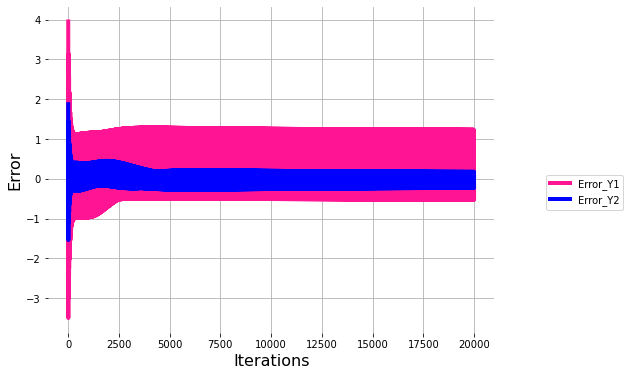

In [677]:
plt.figure(figsize=(8,6))

plt.plot(error_acumulado[:,0], linewidth=4, color='deeppink', label='Error_Y1')
plt.plot(error_acumulado[:,1], linewidth=4, color='blue', label='Error_Y2')
plt.ylabel('Error', size=16)
plt.xlabel('Iterations', size=16)
plt.legend(bbox_to_anchor=(1.3,0.5))
plt.grid()
plt.box(False)
plt.show()


In [678]:
error_acumulado[-1]

matrix([[-0.1629962 ,  0.06268458]])